<a href="https://colab.research.google.com/github/ipleiria-robotics/MonoCamCalib4AD/blob/master/Calibration%26BirdsEyeView.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calibration

Each camera it’s composed by one sensor and one lens and its characterized by intrinsic parameters, that is the relationship between the sensor with the lens and extrinsic parameters, the relation between the camera itself with the world around. Assuming a specific and unchanged camera through the experience, the intrinsic calibration will be fixed, and because of that, it's just required once. Whereas the extrinsic parameterization is more vulnerable, depends on the movement of the camera or the world to the camera. This way, homography is important to manipulate the virtual position of the camera and get a determined point-of-view desire by the user.

For this reason, the page is divided in 2 main section.

*   Intrinsic Parameterization (Calibration)
  * Normal/Wide Angle Lens
  * Fish Eye Lens
*   Extrinsic Parameterization (Homography)
  * Both Lens

\

**NOTE:** It is important to read the following paper to understand all fundamentals behind these procedures.

[DOI: 10.1109/ICARSC49921.2020.9096104](https://www.researchgate.net/publication/341500803_Monocular_Camera_Calibration_for_Autonomous_Driving_-_a_comparative_study)

## Normal and Wide Angle Lens

The calibration process is very similar for both normal/wide-angle and fisheye lens. The difference is the calibration flags, more significant in normal calibration.

**Calibration Flags**
*   CV_CALIB_USE_INTRINSIC_GUESS
*   CV_CALIB_FIX_PRINCIPAL_POINT
*   CV_CALIB_FIX_ASPECT_RATIO
*   CV_CALIB_ZERO_TANGENT_DIST
*   CV_CALIB_FIX_K1,...,CV_CALIB_FIX_K6 \
\
However the most important flags are the next ones.
*   CV_CALIB_RATIONAL_MODEL
*   CV_CALIB_THIN_PRISM_MODEL
*   CV_CALIB_TILTED_MODEL

This flags are optional and depend on the lens itself.


[[332.26638533   0.         305.31271528]
 [  0.         334.10508857 212.04168792]
 [  0.           0.           1.        ]]
[[ 6.46974818e+00  3.24766483e+00 -2.12865341e-04  1.32243775e-04
   1.32107054e-01  6.81498693e+00  5.42828437e+00  7.28043574e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


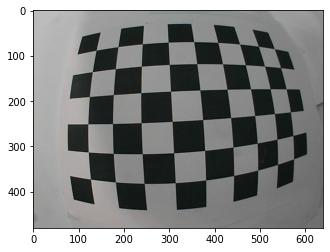

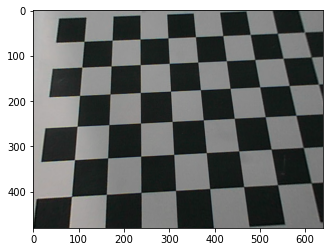

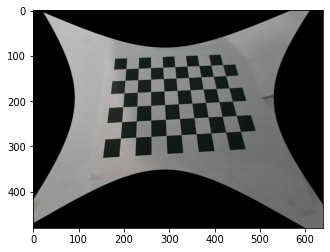

In [ ]:
import numpy as np
from cv2 import cv2
import glob
import matplotlib.pyplot as plt

# Chessboard sizes
CHECKERBOARD_SIZE = (9,6)
CHECKERBOARD_SIDE_SIZE = 25.4

# Prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((1, CHECKERBOARD_SIZE[0]*CHECKERBOARD_SIZE[1], 3), np.float32)
objp[0,:,:2] = CHECKERBOARD_SIDE_SIZE * \
np.mgrid[0:CHECKERBOARD_SIZE[0], 0:CHECKERBOARD_SIZE[1]].T.reshape(-1, 2)


# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

# All the images must to have the same size for calibration
images = glob.glob('drive/My Drive/Colab Notebooks/Normal_Images/*.jpg')

for fname in images:

    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD_SIZE,None)

    if ret == True:
        objpoints.append(objp)

        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
          #img = cv2.drawChessboardCorners(img, CHECKERBOARD_SIZE, corners2,ret)
          #cv2.imshow('img',img)

# Flags for calibration, use "0" if you dont pretend any particular calibration.
calibration_flags=cv2.CALIB_RATIONAL_MODEL

ret,K,D,rvecs,tvecs,stdDeviationsIntrinsics,stdDeviationsExtrinsics,perViewErrors = \
  cv2.calibrateCameraExtended(
        objpoints,
        imgpoints, 
        gray.shape[::-1],
        None,
        None,
        None,
        None,
        None,
        None,
        None,
        calibration_flags
  )

# Load image for test calibration
img =cv2.imread("drive/My Drive/Colab Notebooks/Normal_Images/65.jpg")
new_K,roi=cv2.getOptimalNewCameraMatrix(K,D,gray.shape[::-1],1,gray.shape[::-1])

# Undistort
undistorted_img1 = cv2.undistort(img, K, D, None, None)
map1,map2 = cv2.initUndistortRectifyMap(K,D,None,new_K,gray.shape[::-1],5)
undistorted_img2 = cv2.remap(img,map1,map2,cv2.INTER_LINEAR)

plt.imshow(img)
plt.show()
plt.imshow(undistorted_img1)
plt.show()
plt.imshow(undistorted_img2)
plt.show()

## Fisheye Lens

In this case, the calibration flags do not change much, but it is possible to achieve some improvements by using them. Furthermore, the code is very similar just some functions are specific to the fisheye lens.

**Calibration flags:**


*   CALIB_USE_INTRINSIC_GUESS = 1 << 0
*   CALIB_RECOMPUTE_EXTRINSIC = 1 << 1
*   CALIB_CHECK_COND = 1 << 2
*   CALIB_FIX_SKEW = 1 << 3
*   CALIB_FIX_K1 = 1 << 4
*   CALIB_FIX_K2 = 1 << 5
*   CALIB_FIX_K3 = 1 << 6
*   CALIB_FIX_K4 = 1 << 7
*   CALIB_FIX_INTRINSIC = 1 << 8
*   CALIB_FIX_PRINCIPAL_POINT = 1 << 9

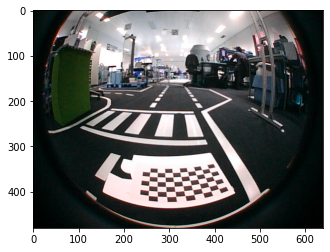

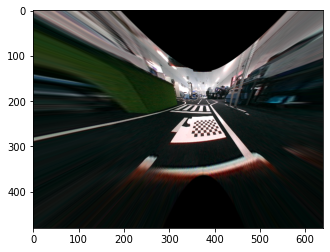

In [ ]:
from cv2 import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt

# Chessboard sizes
CHECKERBOARD_SIZE = (9,6)
CHECKERBOARD_SIDE_SIZE = 25.4

# Prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((1, CHECKERBOARD_SIZE[0]*CHECKERBOARD_SIZE[1], 3), np.float32)
objp[0,:,:2] = CHECKERBOARD_SIDE_SIZE * \
np.mgrid[0:CHECKERBOARD_SIZE[0], 0:CHECKERBOARD_SIZE[1]].T.reshape(-1, 2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

# All the images must to have the same size for calibration
images = glob.glob('drive/My Drive/Colab Notebooks/Fisheye_Images/*.jpg')

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Chess board corners
    ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD_SIZE, cv2.CALIB_CB_ADAPTIVE_THRESH+cv2.CALIB_CB_FAST_CHECK+cv2.CALIB_CB_NORMALIZE_IMAGE)

    # Image points (after refinin them)
    if ret == True:

        objpoints.append(objp)
        cv2.cornerSubPix(gray,corners,(3,3),(-1,-1),subpix_criteria)
        imgpoints.append(corners)
        # Draw and display the corners
         #img = cv2.drawChessboardCorners(img, (9,6), corners,ret)
         #cv2.imshow('Detection Points',img)

N_OK = len(objpoints)
K = np.zeros((3, 3))
D = np.zeros((4, 1))
rvecs = [np.zeros((1, 1, 3), dtype=np.float64) for i in range(N_OK)]
tvecs = [np.zeros((1, 1, 3), dtype=np.float64) for i in range(N_OK)]

# Calibration parameters
calibration_flags = cv2.fisheye.CALIB_RECOMPUTE_EXTRINSIC

ret,K, D, rvecs, tvecs = \
    cv2.fisheye.calibrate(
        objpoints,
        imgpoints,
        gray.shape[::-1],
        None,
        None,
        None,
        None,
        calibration_flags  
    )

# Load image for test calibration
original = cv2.imread("drive/My Drive/Colab Notebooks/Example.jpg")

# Calibration Functions
new_K = cv2.fisheye.estimateNewCameraMatrixForUndistortRectify(K, D, gray.shape[::-1], np.eye(3), balance=1, new_size=gray.shape[::-1],fov_scale=1)
map1, map2 = cv2.fisheye.initUndistortRectifyMap(K, D, np.eye(3), new_K, gray.shape[::-1], cv2.CV_16SC2)
undistorted_img = cv2.remap(original, map1, map2, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)

plt.imshow(original)
plt.show()
plt.imshow(undistorted_img)
plt.show()

After calibration it's possible execute the correction using two methods. The first one, saving the ***K*** and ***D*** variables that are the intrisic parameters and use all the three *calibration funcitons*. Or, the second method, just using the ***map1*** and ***map2*** variables to save time and this away you just need to use the last one *calibration function*.

# Homography


After getting the intrinsic parameters the next step is to compute the extrinsic parameters. These values have as reference a world object, in this case, a chessboard on the floor.

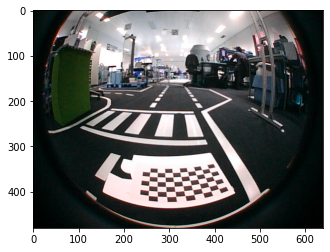

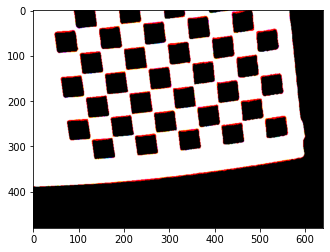

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from numpy.linalg import inv

# Load an image
original = cv2.imread('drive/My Drive/Colab Notebooks/Example.jpg')

# Load intrinsic parameters
K=np.loadtxt('drive/My Drive/Colab Notebooks/K_file.txt')
D=np.loadtxt('drive/My Drive/Colab Notebooks/D_file.txt')

# Chessboard sizes
CHECKERBOARD_SIZE = (9,6)
CHECKERBOARD_SIDE_SIZE = 25.4

# Arrays to store object points and image points from all the images.
objpoints = np.empty((0, CHECKERBOARD_SIZE[0] * CHECKERBOARD_SIZE[1], 1, 3), np.float32)
imgpoints = np.empty((0, CHECKERBOARD_SIZE[0] * CHECKERBOARD_SIZE[1], 1, 2), np.float32)

# Prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((CHECKERBOARD_SIZE[0] * CHECKERBOARD_SIZE[1], 1, 3), np.float32)
objp[:, 0, :2] = CHECKERBOARD_SIDE_SIZE * \
np.mgrid[0:CHECKERBOARD_SIZE[0], 0:CHECKERBOARD_SIZE[1]].T.reshape(-1, 2)

# Calibration Functions
new_K = cv2.fisheye.estimateNewCameraMatrixForUndistortRectify(K, D, original.shape[-2::-1], np.eye(3), balance=1, new_size=original.shape[-2::-1],fov_scale=0.58)
# To recentre the image
new_K[0,2]=int(original.shape[1]/2)
new_K[1,2]=int(original.shape[0]/2)
map1, map2 = cv2.fisheye.initUndistortRectifyMap(K, D, np.eye(3), new_K, original.shape[-2::-1], cv2.CV_16SC2)
undistorted_img1 = cv2.remap(original, map1, map2, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)

# Get rotation and translation vector of the original image
ret, corners1 = cv2.findChessboardCorners(undistorted_img1, CHECKERBOARD_SIZE)
retval, rvec1, tvec1 = cv2.solvePnP(objp, corners1, new_K, np.zeros((4, 1), np.float32))

# Desire rotation and translation over the object
rvec2=np.array([[0.0],      # X
                [0.0],      # Y
                [-0.12]])   # Z

tvec2=np.array([[-150.0],   # X
                [-400.0],   # Y
                [-375.0]])  # Z

# Compute homography matrix from original image to desire position
R1,jacob1 = cv2.Rodrigues(rvec1)
R2,jacob2=cv2.Rodrigues(rvec2)
R1toR2 = R2 @ R1.transpose()
T1toT2 = R2 @ (-R1.transpose() @ tvec1) + tvec2
normal = np.array([[0.0],
                   [0.0],
                   [1.0]])
normal1 = R1 @ normal
origin = np.zeros((3,1),np.float64)
origin1 = R1 @ origin + tvec1
d_inv =  1.0 / (normal1.transpose() @ origin1)
homography_euclidean = R1toR2 + d_inv * T1toT2 @ normal1.transpose()
homography2 = new_K @ homography_euclidean @ inv(new_K)
homography2 = homography2/homography2[2][2]
homography_euclidean = homography_euclidean/homography_euclidean[2][2]

# Apply warp prespective to image
img1_warp = cv2.warpPerspective(undistorted_img1, homography2, original.shape[-2::-1])
cv2.threshold(img1_warp,150,255,cv2.THRESH_BINARY,img1_warp)

plt.imshow(original)
plt.show()
plt.imshow(img1_warp)
plt.show()